In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# Detecting the file's encoding using chardet to ensure compatibility while reading.

import chardet

with open('spam.csv', 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)

result['encoding']

'Windows-1252'

In [3]:
df = pd.read_csv("spam.csv",encoding="Windows-1252")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

###  Plan of Action

* ##### 1. Data Cleaning  
* ##### 2. EDA
* ##### 3. Text Preprocessing
* ##### 4. Model Building
* ##### 5  Evaluation
* ##### 6. Improvement
* ##### 7. Website Building
* #### 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape

(5572, 2)

In [10]:
# Renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [11]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Encoding the Target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [13]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Checking Missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
# Checking Duplicated values
df.duplicated().sum()

np.int64(403)

In [16]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.shape

(5169, 2)

## 2. EDA

In [20]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

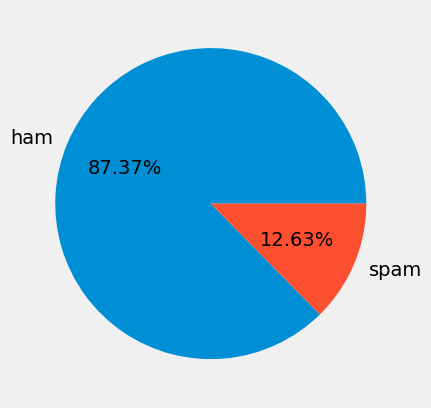

In [21]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f%%")
plt.show()

#### Data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUPRA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']= df['Text'].apply(len)

In [25]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# describe for ham messages

df[df['Target']==0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# describe for spam messages

df[df['Target']==1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

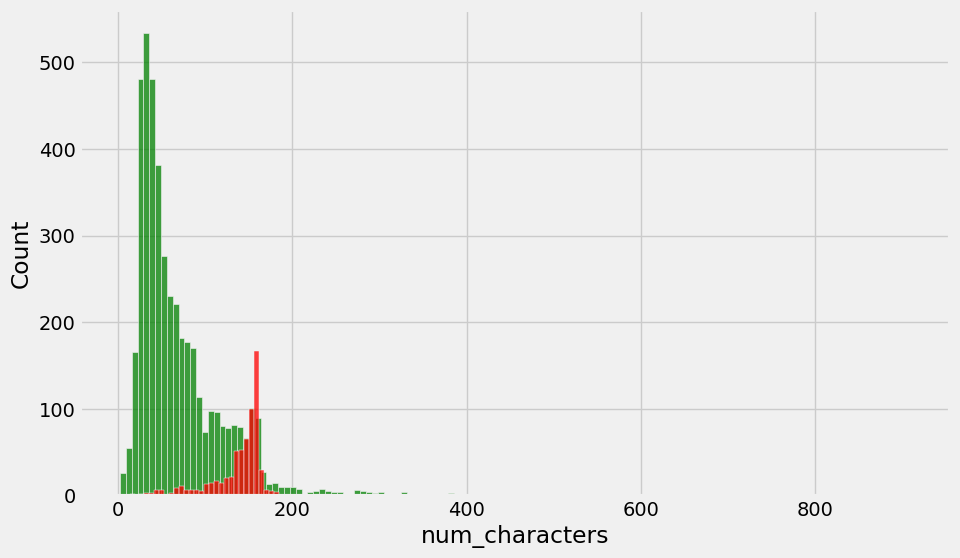

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Target']==0] ['num_characters'],color='green')         #ham
sns.histplot(df[df['Target']==1] ['num_characters'],color='red')           #spam

<Axes: xlabel='num_words', ylabel='Count'>

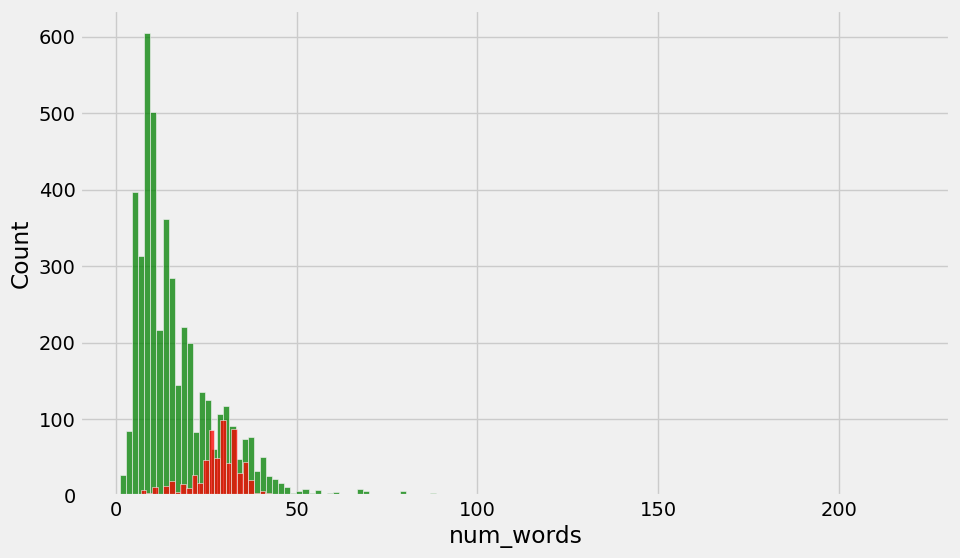

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Target']==0] ['num_words'],color='green')         #ham
sns.histplot(df[df['Target']==1] ['num_words'],color='red')           #spam

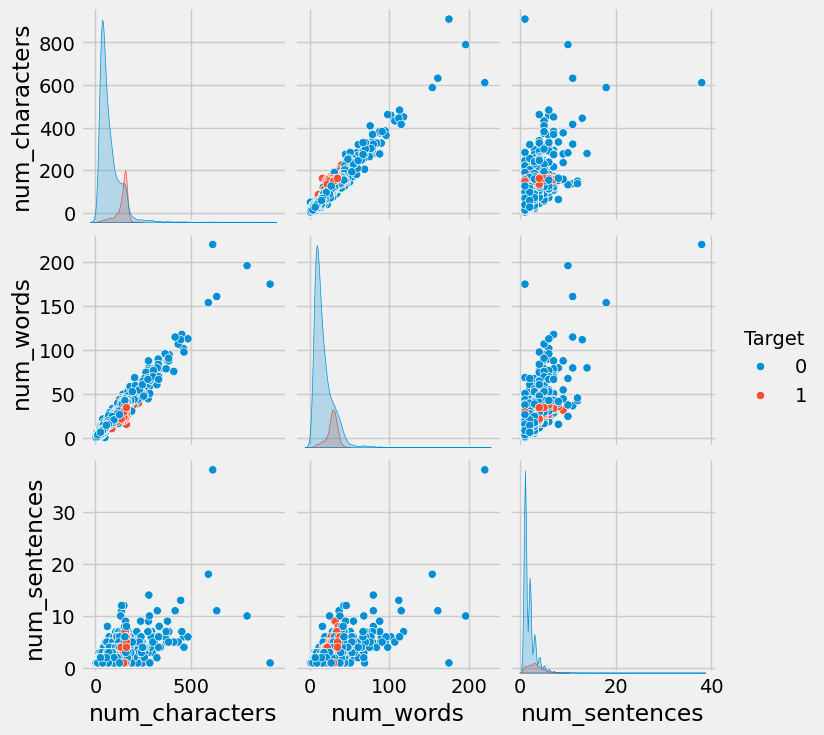

In [38]:
sns.pairplot(df,hue='Target')

In [39]:
df.sample()

,Target,Text,num_characters,num_words,num_sentences
313,0,"Hi the way I was with u 2day, is the normal wa...",142,41,3


<Axes: >

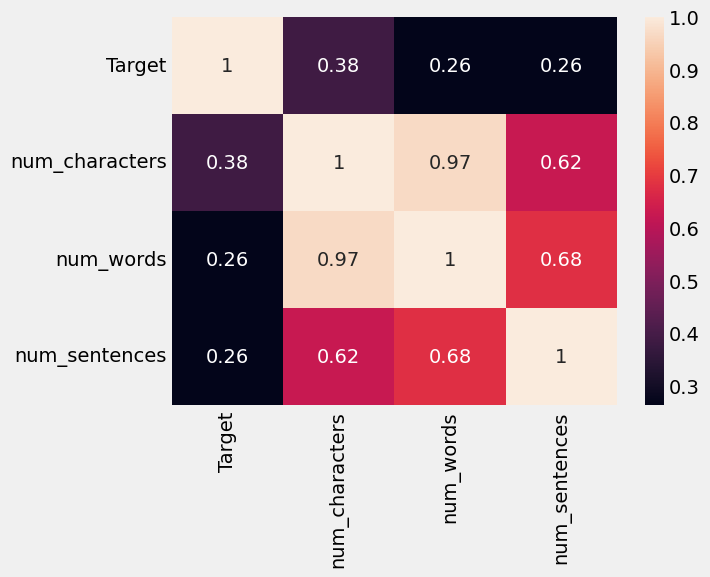

In [40]:
sns.heatmap(df.drop(columns=['Text']).corr(),annot=True)

Since there is multi-collinearity in the data, we will only keep the num_characters columns while building our model.

## 3. Data Preprocessing

* Lowercasing
* Tokenization
* Removing Special Characters
* Removing Stop Words and punctuations
* Stemming

In [41]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


def transforming_text(text):
    
    text = text.lower()
    
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    z = []
    for j in y:
        if j not in stopwords.words('english') and j not in string.punctuation :
            z.append(j)
    
    temp = []
    for word in z:
        temp.append(ps.stem(word))

    return " ".join(temp)

In [42]:
df['Transformed_Text'] = df['Text'].apply(transforming_text)

In [43]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


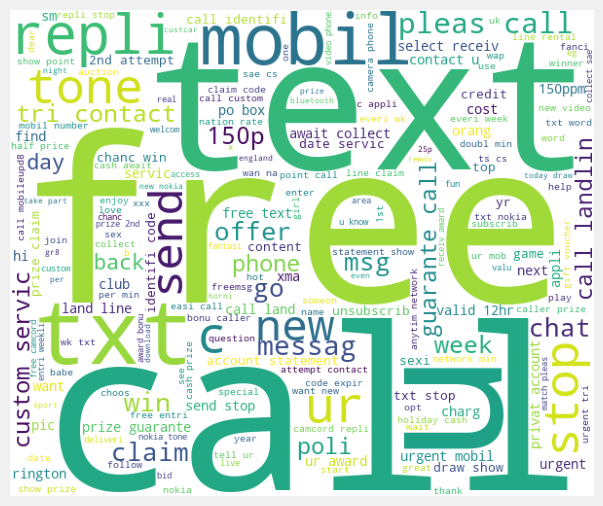

In [44]:
# spam wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=600,height=500,min_font_size=8,background_color='white')

spam_wc= wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(spam_wc)

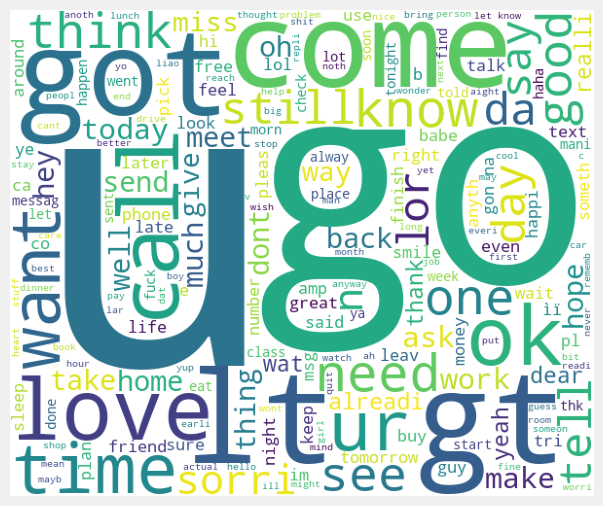

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=500,min_font_size=8,background_color='white')

ham_wc = wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(ham_wc)

In [46]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
# All the spam words in data
spam_list = df[df['Target'] == 1]['Transformed_Text'].tolist()

spam_corpus = []
for i in spam_list:
    for j in i.split():
        spam_corpus.append(j)

len(spam_corpus)

9939

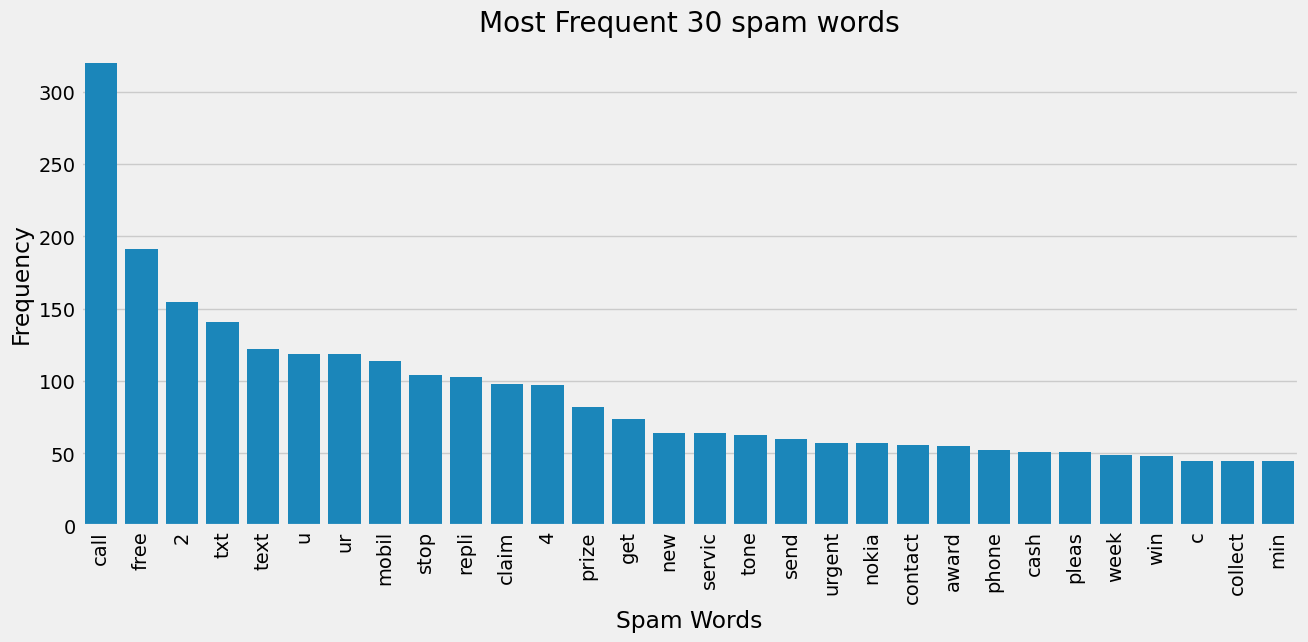

In [48]:
# Top 30 spam words
from collections import Counter

spam_data = pd.DataFrame(Counter(spam_corpus).most_common(30))
top30_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
spam_freq = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

plt.figure(figsize=(14,6))
sns.barplot(data=spam_data,x=top30_spam,y=spam_freq)
plt.xticks(rotation='vertical')
plt.xlabel("Spam Words")
plt.ylabel("Frequency")
plt.title("Most Frequent 30 spam words")
plt.show()

In [49]:
# All the ham words in data
ham_list = df[df['Target'] == 0]['Transformed_Text'].tolist()

ham_corpus = []
for i in ham_list:
    for j in i.split():
        ham_corpus.append(j)

len(ham_corpus)

35404

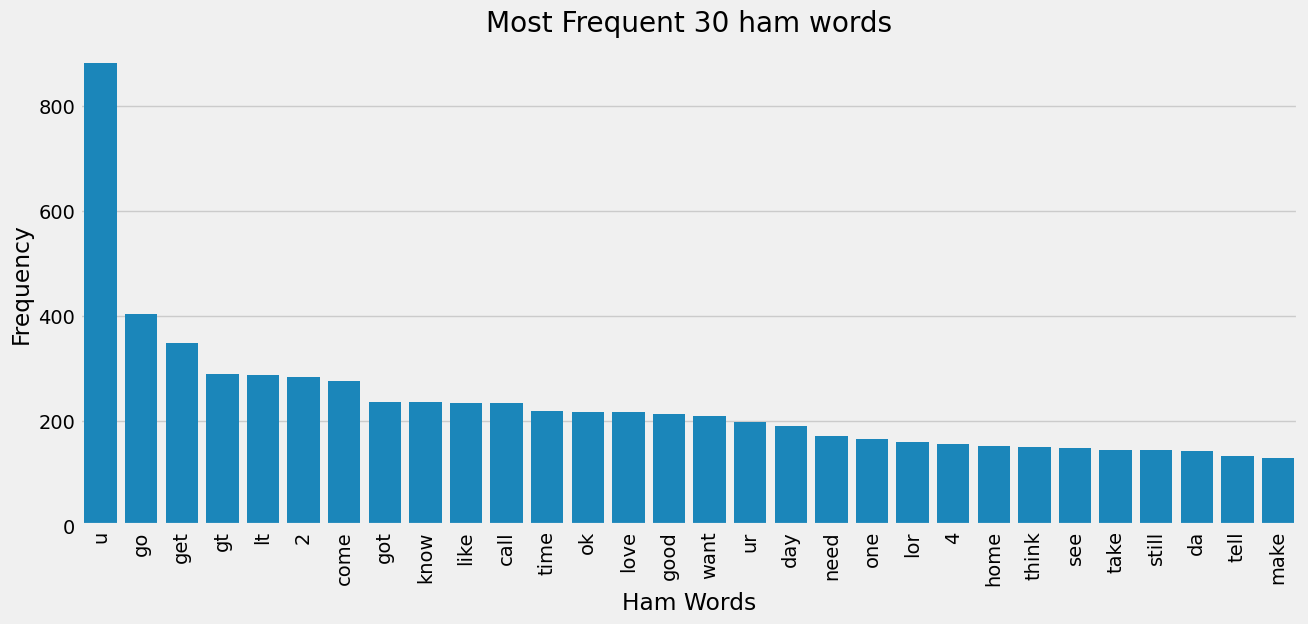

In [50]:
# Top 30 ham words
from collections import Counter

ham_data = pd.DataFrame(Counter(ham_corpus).most_common(30))
top30_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
ham_freq = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

plt.figure(figsize=(14,6))
sns.barplot(data=ham_data,x=top30_ham,y=ham_freq)
plt.xticks(rotation='vertical')
plt.xlabel("Ham Words")
plt.ylabel("Frequency")
plt.title("Most Frequent 30 ham words")
plt.show()

## 4. Model Building

In [183]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['Transformed_Text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [157]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [184]:
X.shape

(5169, 3000)

In [185]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [187]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [188]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [189]:
# Gaussian Naive Bayes
GNB.fit(X_train,y_train)
y_pred1 = GNB.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [190]:
# Multinomial Naive Bayes
MNB.fit(X_train,y_train)
y_pred2 = MNB.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [191]:
# Bernoulli Naive Bayes
BNB.fit(X_train,y_train)
y_pred3 = BNB.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Since the data is imbalanced, we are prioritizing precision score over accuracy. 
So we are choosing the Multinomial model with tfidf

In [166]:
# Testing other algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [167]:
lr = LogisticRegression(solver='liblinear',penalty='l1')
knc = KNeighborsClassifier()
svc = SVC(kernel='sigmoid',gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc = XGBClassifier(n_estimators=50,random_state=2)

In [168]:
clfs = {
    "LR" : lr,
    "KNN" : knc,
    "SVC" : svc,
    "DT" : dtc,
    "Multinomial NB" : mnb,
    "RF" : rfc,
    "ETC" : etc,
    "Bagging_clf" : bc,
    "AdaBoost" : abc,
    "Gradient_Boost" : gbc,
    "XGBoost" : xgbc
}

In [169]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [170]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9824561403508771)

In [171]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_acc, current_prec = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy: ",current_acc)
    print("Precision: ",current_prec)
    print("-"*100)

    accuracy_scores.append(current_acc)
    precision_scores.append(current_prec)

For LR
Accuracy:  0.9593810444874274
Precision:  0.9528301886792453
----------------------------------------------------------------------------------------------------
For KNN
Accuracy:  0.9303675048355899
Precision:  0.8113207547169812
----------------------------------------------------------------------------------------------------


C:\Users\SUPRA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For SVC
Accuracy:  0.8665377176015474
Precision:  0.0
----------------------------------------------------------------------------------------------------
For DT
Accuracy:  0.9487427466150871
Precision:  0.897196261682243
----------------------------------------------------------------------------------------------------
For Multinomial NB
Accuracy:  0.9400386847195358
Precision:  1.0
----------------------------------------------------------------------------------------------------
For RF
Accuracy:  0.9729206963249516
Precision:  0.9824561403508771
----------------------------------------------------------------------------------------------------
For ETC
Accuracy:  0.9806576402321083
Precision:  0.9836065573770492
----------------------------------------------------------------------------------------------------
For Bagging_clf
Accuracy:  0.960348162475822
Precision:  0.8646616541353384
------------------------------------------------------------------------------------------------

In [119]:
performance_df = pd.DataFrame({
    'Algorithm' : clfs.keys(),
    'Accuracy' : accuracy_scores,
    'Precision' : precision_scores
}
                              ).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.900387,1.000000
5,RF,0.971954,1.000000
4,Multinomial NB,0.959381,1.000000
6,ETC,0.972921,0.982456
2,SVC,0.972921,0.974138
10,XGBoost,0.972921,0.943548
0,LR,0.951644,0.940000
9,Gradient_Boost,0.952611,0.923810
7,Bagging_clf,0.958414,0.862595
3,DT,0.937137,0.854369


In [120]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')

performance_df1

,Algorithm,variable,value
0,KNN,Accuracy,0.900387
1,RF,Accuracy,0.971954
2,Multinomial NB,Accuracy,0.959381
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,XGBoost,Accuracy,0.972921
6,LR,Accuracy,0.951644
7,Gradient_Boost,Accuracy,0.952611
8,Bagging_clf,Accuracy,0.958414
9,DT,Accuracy,0.937137


<Figure size 1400x700 with 0 Axes>

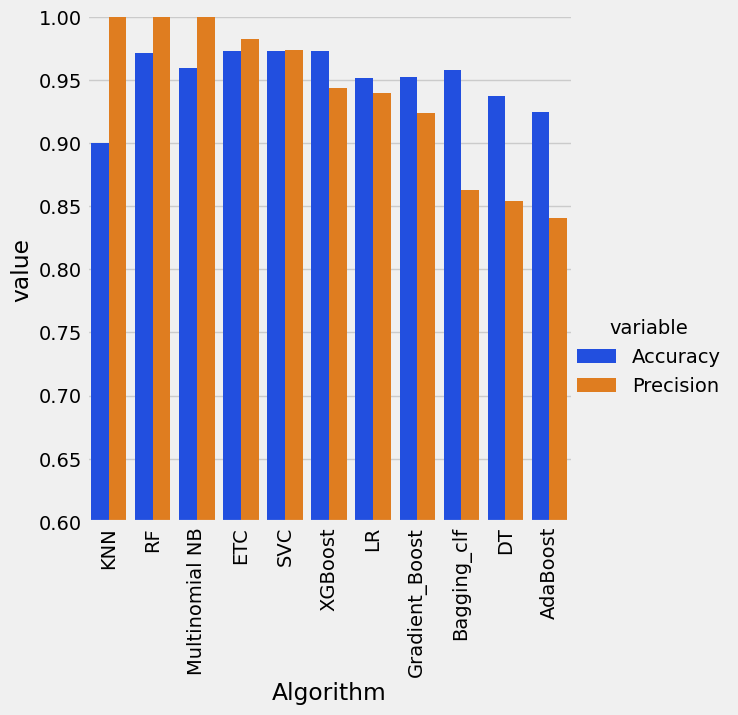

In [121]:
sns.set_palette('bright')
plt.figure(figsize=(14,7))
sns.catplot(
    data = performance_df1,
    x = 'Algorithm',
    y = 'value',
    hue = 'variable',
    kind = 'bar',
    height = 6)


plt.ylim(0.6,1.0)
plt.xticks(rotation='vertical')
plt.show()

### -- Improving the model performance --

In [137]:
# Changing the Tfidf parameter max_features = 3000
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),
                        'Accuracy_max_ft_3000':accuracy_scores,
                        'Precision_max_ft_3000':precision_scores}
                      ).sort_values('Precision_max_ft_3000',ascending=False)

In [138]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KNN,0.900387,1.000000,0.905222,1.000000
1,RF,0.971954,1.000000,0.973888,0.982609
2,Multinomial NB,0.959381,1.000000,0.970986,1.000000
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,XGBoost,0.972921,0.943548,0.965184,0.939655
6,LR,0.951644,0.940000,0.955513,0.960000
7,Gradient_Boost,0.952611,0.923810,0.950677,0.930693
8,Bagging_clf,0.958414,0.862595,0.958414,0.868217
9,DT,0.937137,0.854369,0.930368,0.830000


for MNB, precision is still 100% but the accuracy actually improved.

In [ ]:
# Sccaling

In [154]:
temp_df_scaled = pd.DataFrame({'Algorithm':clfs.keys(),
                        'Accuracy_scaling':accuracy_scores,
                        'Precision_scaling':precision_scores}
                      ).sort_values('Precision_scaling',ascending=False)

In [155]:
performance_df.merge(temp_df,on='Algorithm').merge(temp_df_scaled,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KNN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,RF,0.971954,1.000000,0.973888,0.982609,0.973888,0.982609
2,Multinomial NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.970019,0.942149
5,XGBoost,0.972921,0.943548,0.965184,0.939655,0.965184,0.939655
6,LR,0.951644,0.940000,0.955513,0.960000,0.967118,0.964286
7,Gradient_Boost,0.952611,0.923810,0.950677,0.930693,0.950677,0.930693
8,Bagging_clf,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
9,DT,0.937137,0.854369,0.930368,0.830000,0.933269,0.841584


Clearly in the MNB, after scaling although the accuracy is increasing a little, but precision drops down.

In [172]:
# Afrer adding the 'num_characters column'
temp_df_num_char = pd.DataFrame({'Algorithm':clfs.keys(),
                                 'Accuracy_num_chars':accuracy_scores,
                                 'Precision_num_chars':precision_scores}
                               ).sort_values('Precision_num_chars',ascending=False)

In [173]:
performance_df.merge(temp_df,on='Algorithm').merge(temp_df_scaled,on='Algorithm').merge(temp_df_num_char,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KNN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.930368,0.811321
1,RF,0.971954,1.000000,0.973888,0.982609,0.973888,0.982609,0.972921,0.982456
2,Multinomial NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.940039,1.000000
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.980658,0.983607
4,SVC,0.972921,0.974138,0.975822,0.974790,0.970019,0.942149,0.866538,0.000000
5,XGBoost,0.972921,0.943548,0.965184,0.939655,0.965184,0.939655,0.970019,0.942149
6,LR,0.951644,0.940000,0.955513,0.960000,0.967118,0.964286,0.959381,0.952830
7,Gradient_Boost,0.952611,0.923810,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,Bagging_clf,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.960348,0.864662
9,DT,0.937137,0.854369,0.930368,0.830000,0.933269,0.841584,0.948743,0.897196


Although precision is unchanged but accuracy dropped for MNB.

In [181]:
# Testing Voting Classifier
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

voting = VotingClassifier(estimators=[('SVM',svc),('MNB',mnb),('ETC',etc)],
                      voting='soft',
                      n_jobs=-1)

voting.fit(X_train,y_train)

y_pred_voting = voting.predict(X_test)

print("Accuracy",accuracy_score(y_test,y_pred_voting))
print("Precision",precision_score(y_test,y_pred_voting))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [182]:
# Testing Stacking Classifier
from sklearn.ensemble import StackingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

stacking = StackingClassifier(estimators=[('SVM',svc),('MNB',mnb),('ETC',etc)],
                              final_estimator=RandomForestClassifier(),
                              n_jobs=-1)

stacking.fit(X_train,y_train)

y_pred_stacking = stacking.predict(X_test)

print("Accuracy",accuracy_score(y_test,y_pred_stacking))
print("Precision",precision_score(y_test,y_pred_stacking))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


*  We can clearly see after trying out different algorithms and combinations, MultiNomial Naive Bayes with TfIdf (max_features=3000) is the best model in terms of precision and accuracy.
*  So finally, we will select this model for our project.

In [192]:
import pickle
pickle.dump(tfidf,open('tfidf_vectorizer.pkl','wb'))
pickle.dump(MNB,open('model.pkl','wb'))

In [210]:
txt = "Please call here to get an oppurtunity!"
txt_trf = transforming_text(txt)
vec = tfidf.fit_transform([txt_trf]).toarray()
MNB.predict(vec[0].reshape(-1,1))

ValueError: X has 1 features, but MultinomialNB is expecting 3000 features as input.